<a href="https://colab.research.google.com/github/04-AhmadThariqRamadhan/PCVK_Genap_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AHMAD THARIQ RAMADHAN / 02 / TI-3B

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

#GAMMA CORRECTION

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


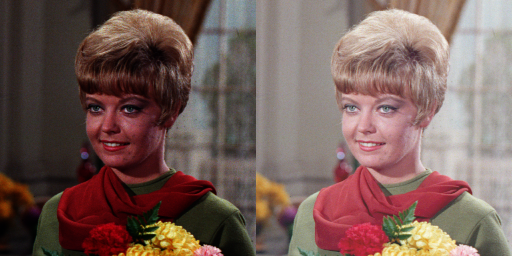

In [5]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255, 1/gamma), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

# IMAGE DEPTH

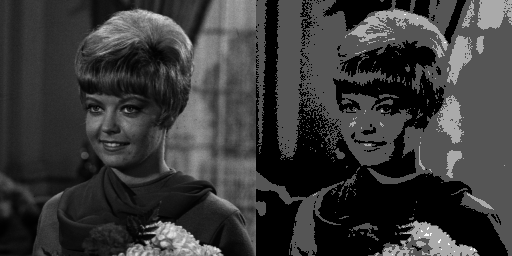

In [7]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original_depth = cv.imread('/content/drive/MyDrive/images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original_depth.shape, original_depth.dtype)

for y in range(original_depth.shape[0]):
  for x in range(original_depth.shape[1]):
    depth_image[y, x] = np.clip(round(original_depth[y, x]/level) * level, 0, 255)

final_frame = cv.hconcat((original_depth, depth_image))
cv2_imshow(final_frame)

#AVERAGE DENOISING

In [12]:
import glob

cv_img = []
for img in glob.glob('/content/drive/MyDrive/images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

In [9]:
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): 
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

#DENOISING 5 KALI

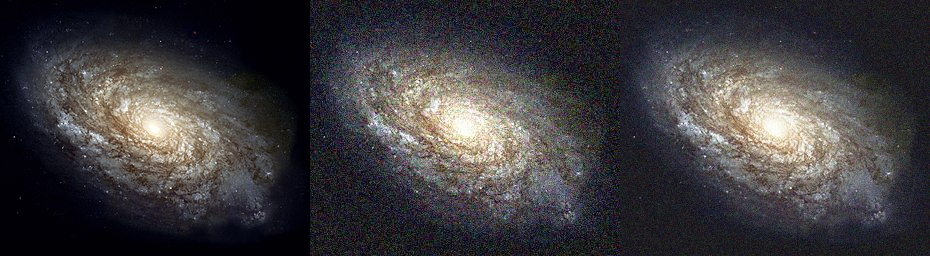

NILAI PSNR ADALAH:  29.108037270402733


In [13]:
ori = cv.imread('/content/drive/MyDrive/images/galaxy.jpg')
img = np.zeros(ori.shape, ori.dtype)
sum = np.zeros(ori.shape, dtype=np.int32)

for img in cv_img[0:5]:
  for y in range(img.shape[0]):
    for x in range(img.shape[1]):
      for c in range(img.shape[2]):
        sum[y, x, c] += int(img[y, x, c])

for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      for z in range(img.shape[2]):
        img[x, y, z] = np.clip(round(sum[x, y, z] / 5),0,255)

final_frame_avg = cv.hconcat((ori, cv_img[0], img))
cv2_imshow(final_frame_avg)

print('NILAI PSNR ADALAH: ', PSNR(cv_img[0], img))

#DENOISING 30 KALI

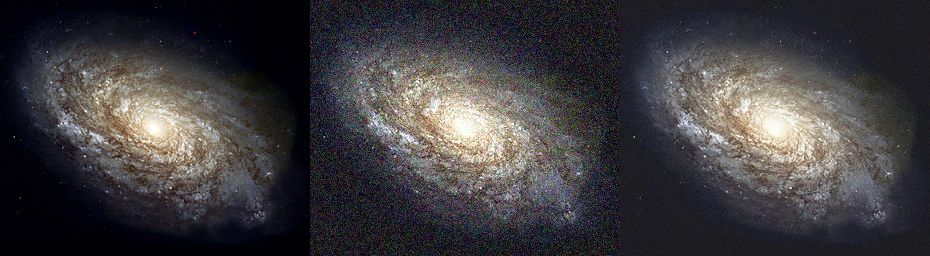

NILAI PSNR ADALAH:  28.92843478324764


In [14]:
img2 = np.zeros(ori.shape, ori.dtype)
sum2 = np.zeros(ori.shape, dtype=np.int32)

for img2 in cv_img[0:30]:
  for y in range(img2.shape[0]):
    for x in range(img2.shape[1]):
      for c in range(img2.shape[2]):
        sum2[y, x, c] += int(img2[y, x, c])

for x in range(img2.shape[0]):
    for y in range(img2.shape[1]):
      for z in range(img2.shape[2]):
        img2[x, y, z] = np.clip(round(sum2[x, y, z] / 30),0,255)

final_frame_avg = cv.hconcat((ori, cv_img[0], img2))
cv2_imshow(final_frame_avg)

print('NILAI PSNR ADALAH: ', PSNR(cv_img[0], img2))

#DENOISING 60 KALI

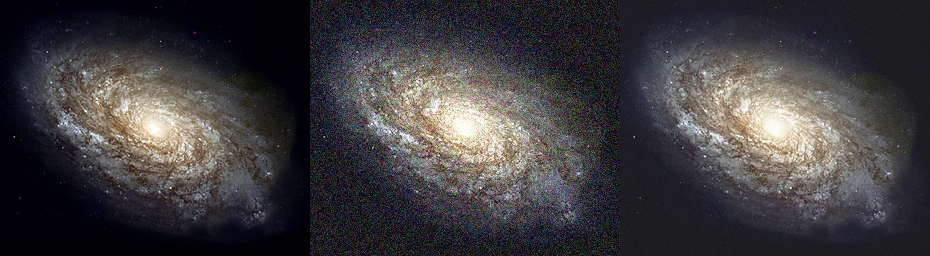

NILAI PSNR ADALAH:  28.920779461944633


In [15]:
img3 = np.zeros(ori.shape, ori.dtype)
sum3 = np.zeros(ori.shape, dtype=np.int32)

for img3 in cv_img[0:60]:
  for y in range(img3.shape[0]):
    for x in range(img3.shape[1]):
      for c in range(img3.shape[2]):
        sum3[y, x, c] += int(img3[y, x, c])

for x in range(img3.shape[0]):
    for y in range(img3.shape[1]):
      for z in range(img3.shape[2]):
        img3[x, y, z] = np.clip(round(sum3[x, y, z] / 60),0,255)

final_frame_avg = cv.hconcat((ori, cv_img[0], img3))
cv2_imshow(final_frame_avg)

print('NILAI PSNR ADALAH: ', PSNR(cv_img[0], img3))

#DENOISING 80 KALI

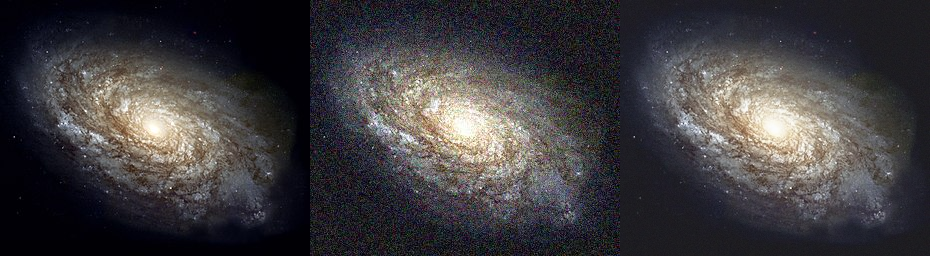

NILAI PSNR ADALAH:  28.915281288788755


In [16]:
img4 = np.zeros(ori.shape, ori.dtype)
sum4 = np.zeros(ori.shape, dtype=np.int32)

for img4 in cv_img[0:80]:
  for y in range(img4.shape[0]):
    for x in range(img4.shape[1]):
      for c in range(img4.shape[2]):
        sum4[y, x, c] += int(img4[y, x, c])

for x in range(img4.shape[0]):
    for y in range(img4.shape[1]):
      for z in range(img4.shape[2]):
        img4[x, y, z] = np.clip(round(sum4[x, y, z] / 80),0,255)

final_frame_avg = cv.hconcat((ori, cv_img[0], img4))
cv2_imshow(final_frame_avg)

print('NILAI PSNR ADALAH: ', PSNR(cv_img[0], img4))

#DENOISING 100 KALI

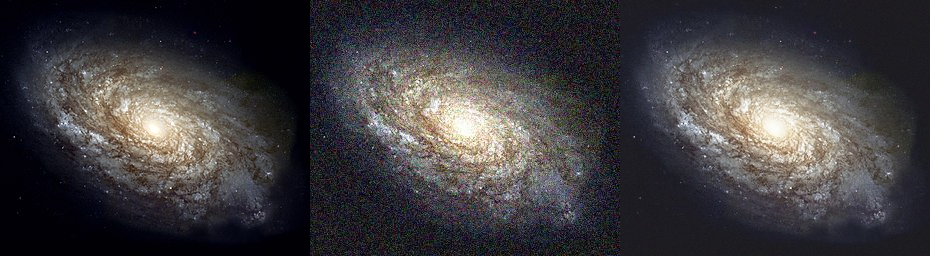

NILAI PSNR ADALAH:  28.910024259213138


In [17]:
img5 = np.zeros(ori.shape, ori.dtype)
sum5 = np.zeros(ori.shape, dtype=np.int32)

for img5 in cv_img[0:100]:
  for y in range(img5.shape[0]):
    for x in range(img5.shape[1]):
      for c in range(img5.shape[2]):
        sum5[y, x, c] += int(img5[y, x, c])

for x in range(img5.shape[0]):
    for y in range(img5.shape[1]):
      for z in range(img5.shape[2]):
        img5[x, y, z] = np.clip(round(sum5[x, y, z] / 100),0,255)

final_frame_avg = cv.hconcat((ori, cv_img[0], img5))
cv2_imshow(final_frame_avg)

print('NILAI PSNR ADALAH: ', PSNR(cv_img[0], img5))

#KESIMPULAN
Semakin tinggi nilai PNSR semakin mirip dengan citra asli yang dibandingkan

#IMAGE MASKING

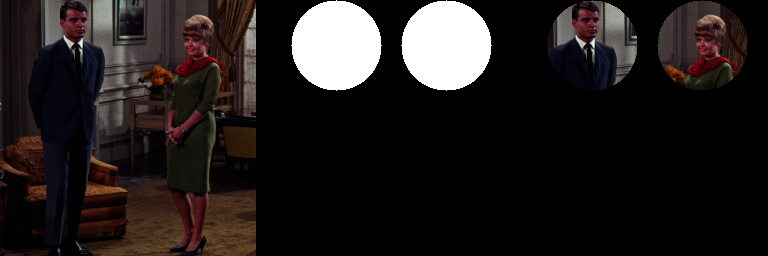

In [18]:
# AND
img_mask = cv.imread('/content/drive/MyDrive/images/couple.tiff')

mask1 = np.zeros(img_mask.shape, dtype=np.uint8)
mask = cv.circle(mask1,(80, 45), 45, (255,255,255), -1)
mask = cv.circle(mask1,(190, 45), 45, (255,255,255), -1)

result = img_mask & mask

final_frame_mask = cv.hconcat((img_mask, mask, result))
cv2_imshow(final_frame_mask)

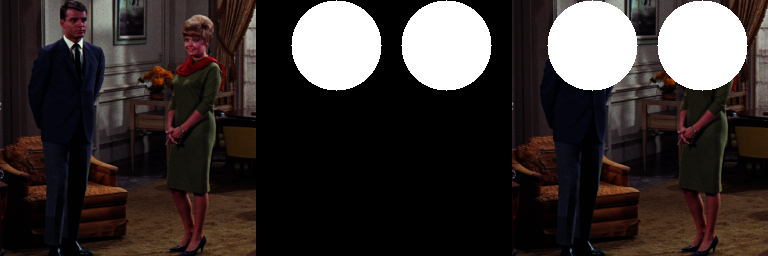

In [19]:
#OR
result2 = img_mask | mask

final_frame_mask2 = cv.hconcat((img_mask, mask, result2))
cv2_imshow(final_frame_mask2)

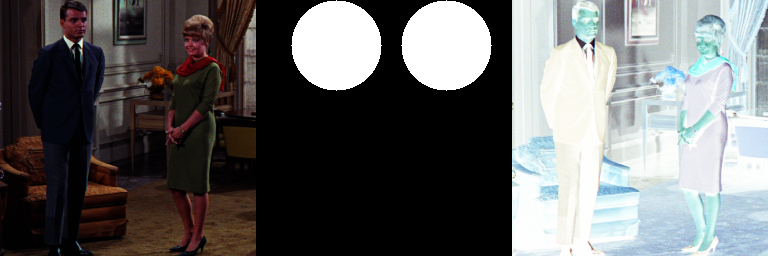

In [20]:
#NOT
result3 = ~img_mask

final_frame_mask3 = cv.hconcat((img_mask, mask, result3))
cv2_imshow(final_frame_mask3)

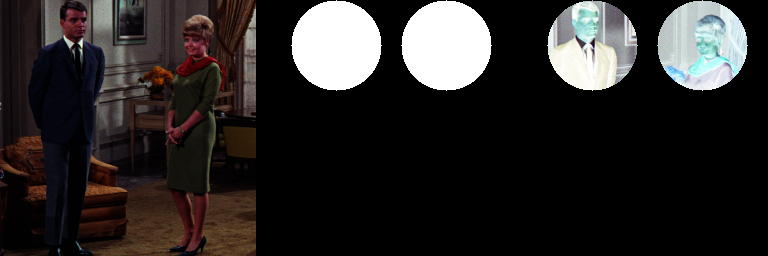

In [21]:
#NAND
result4 = ~img_mask & mask

final_frame_mask4 = cv.hconcat((img_mask, mask, result4))
cv2_imshow(final_frame_mask4)

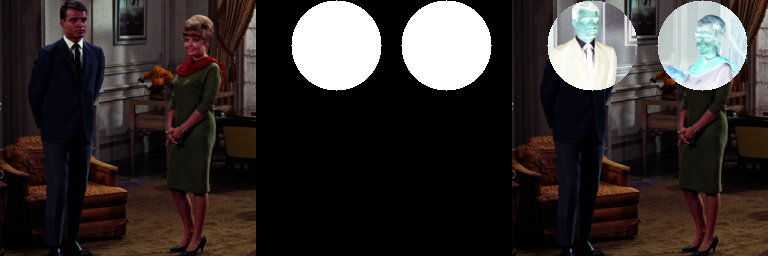

In [22]:
#XOR
result5 = img_mask ^ mask

final_frame_mask5 = cv.hconcat((img_mask, mask, result5))
cv2_imshow(final_frame_mask5)

#KESIMPULAN
operator AND menampilkan output gambar asli pada area bulatan
operator OR menampilkan output gambar asli pada area selain bulatan
operator NOT menampilkan output gambar yang nilai pixelnya dibalik
operator NAND menampilkan output gambar yang nilai pixelnya dibalik dan menampilkan gambar asli pada area bulatan
operator XOR menampilkan gambar yang nilai pixelnya dibalik pada area bulatan saja